In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("Data.csv")

<Figure size 1500x800 with 0 Axes>

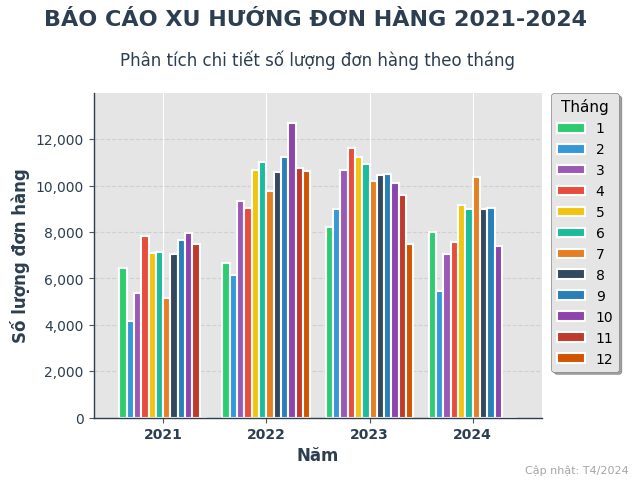

In [11]:
# Thiết lập kích thước figure và style
plt.figure(figsize=(15, 8))
plt.style.use('ggplot')

# Tạo dữ liệu
year_month_data = df.groupby(['Year', 'Month']).size().unstack()

# Tạo bảng màu đẹp
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f1c40f', 
          '#1abc9c', '#e67e22', '#34495e', '#2980b9', '#8e44ad',
          '#c0392b', '#d35400']

# Vẽ biểu đồ
ax = year_month_data.plot(kind='bar', width=0.85,
                         color=colors,
                         edgecolor='white',
                         linewidth=1.5)

# Thêm tiêu đề chính và phụ
plt.suptitle('BÁO CÁO XU HƯỚNG ĐƠN HÀNG 2021-2024', 
             fontsize=16, 
             fontweight='bold',
             color='#2c3e50',
             y=0.98)

plt.title('Phân tích chi tiết số lượng đơn hàng theo tháng', 
          pad=20, 
          fontsize=12,
          color='#2c3e50')

plt.xlabel('Năm', fontsize=12, fontweight='bold', color='#2c3e50')
plt.ylabel('Số lượng đơn hàng', fontsize=12, fontweight='bold', color='#2c3e50')

# Chỉnh sửa legend
plt.legend(title='Tháng', 
          title_fontsize=11,
          fontsize=10,
          bbox_to_anchor=(1.02, 1),
          borderaxespad=0,
          frameon=True,
          edgecolor='gray',
          fancybox=True,
          shadow=True)

# Thêm lưới nền
plt.grid(True, axis='y', linestyle='--', alpha=0.2, color='gray')

# Định dạng trục x và y
plt.xticks(rotation=0, color='#2c3e50', fontweight='bold')
plt.yticks(color='#2c3e50')

# Định dạng số cho trục y
def format_func(value, tick_number):
    return f'{int(value):,}'
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

# Đặt giới hạn trục y
plt.ylim(0, year_month_data.max().max() * 1.1)

# Thêm comma separator cho giá trị trục y
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# Điều chỉnh spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#2c3e50')
ax.spines['bottom'].set_color('#2c3e50')

# Thêm chú thích thời gian cập nhật
plt.figtext(0.99, 0.01, 'Cập nhật: T4/2024', 
            ha='right', va='bottom', 
            fontsize=8, color='gray', alpha=0.7)

# Điều chỉnh khoảng cách
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

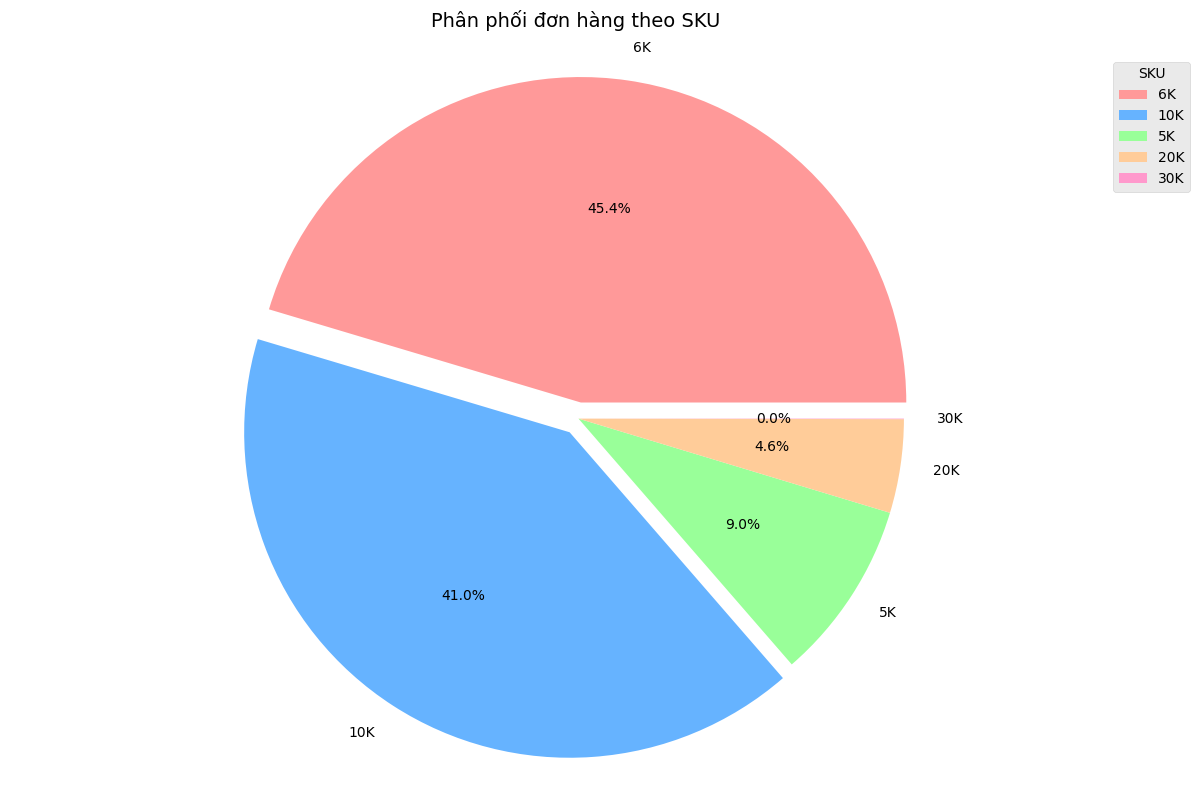

In [12]:
plt.figure(figsize=(12, 8))
sku_data = df['SKU'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']

plt.pie(sku_data, labels=sku_data.index, autopct='%1.1f%%', colors=colors,
        explode=[0.05, 0.05, 0, 0, 0])
plt.title('Phân phối đơn hàng theo SKU', pad=20, fontsize=14)
plt.legend(sku_data.index, title="SKU", bbox_to_anchor=(1.05, 1))
plt.axis('equal')
plt.tight_layout()
plt.show()

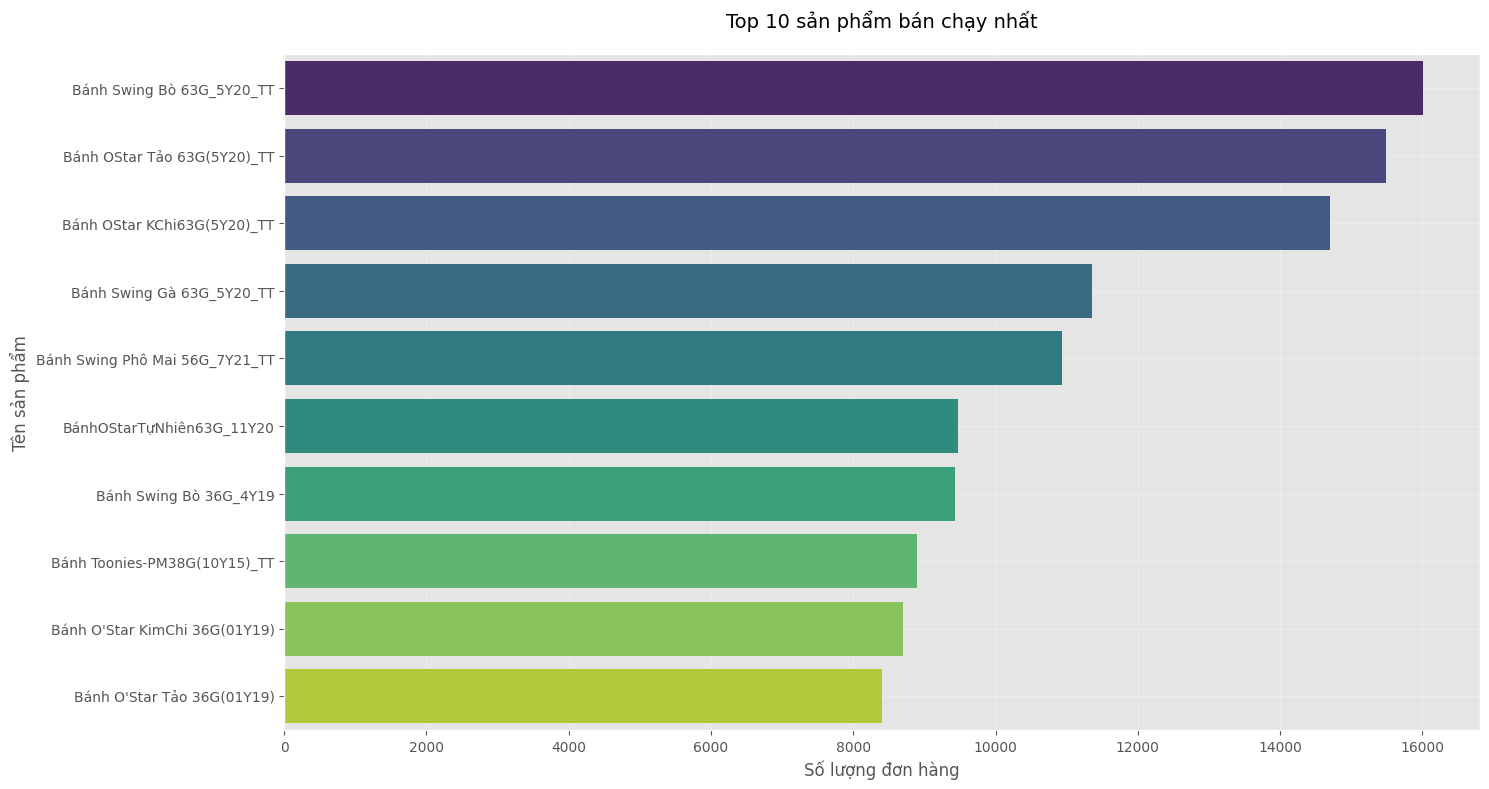

In [13]:
plt.figure(figsize=(15, 8))
product_data = df['PrdDsc'].value_counts().head(10)
sns.barplot(x=product_data.values, y=product_data.index, palette='viridis')
plt.title('Top 10 sản phẩm bán chạy nhất', pad=20, fontsize=14)
plt.xlabel('Số lượng đơn hàng', fontsize=12)
plt.ylabel('Tên sản phẩm', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

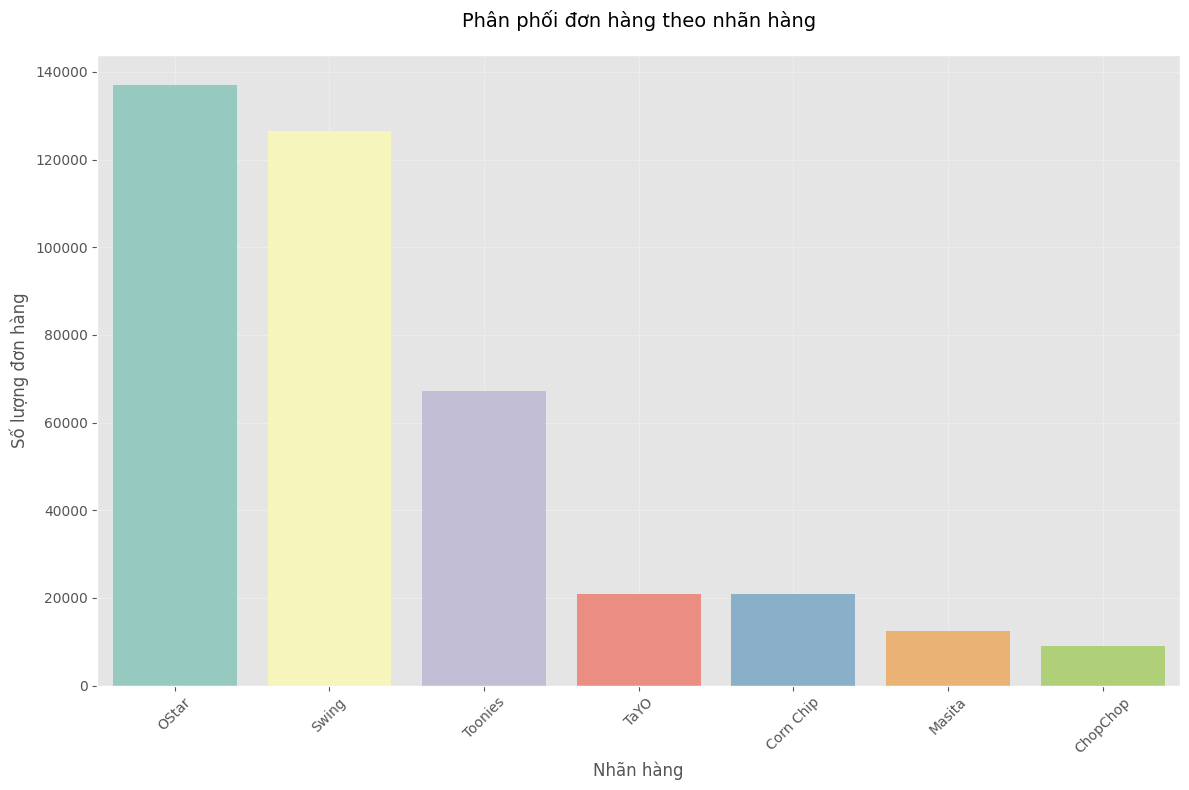

In [14]:
plt.figure(figsize=(12, 8))
brand_data = df['PRDCLS1'].value_counts()
sns.barplot(x=brand_data.index, y=brand_data.values, palette='Set3')
plt.title('Phân phối đơn hàng theo nhãn hàng', pad=20, fontsize=14)
plt.xlabel('Nhãn hàng', fontsize=12)
plt.ylabel('Số lượng đơn hàng', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

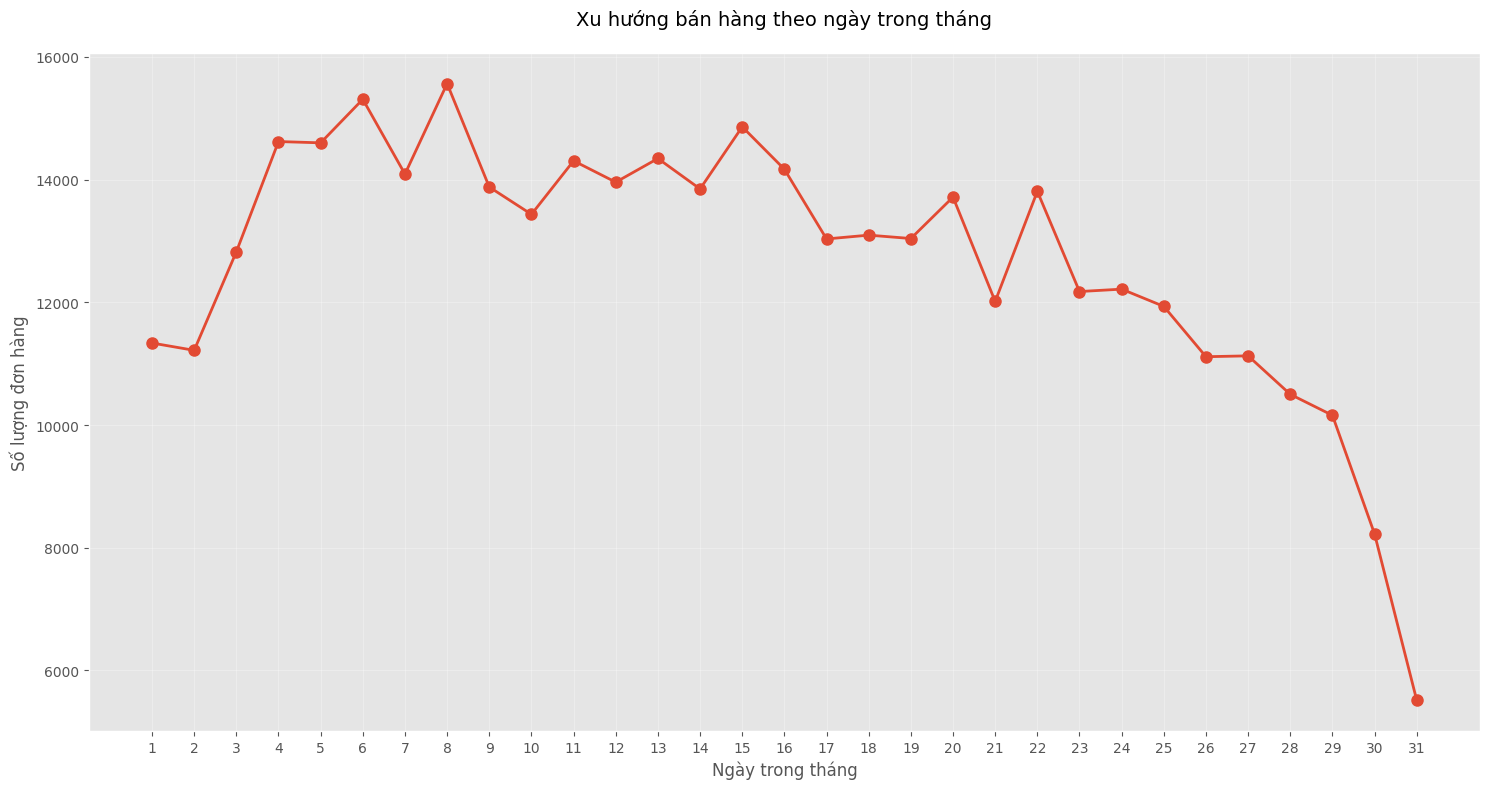

In [15]:
plt.figure(figsize=(15, 8))
date_data = df['Date'].value_counts().sort_index()
plt.plot(date_data.index, date_data.values, marker='o', linewidth=2, markersize=8)
plt.title('Xu hướng bán hàng theo ngày trong tháng', pad=20, fontsize=14)
plt.xlabel('Ngày trong tháng', fontsize=12)
plt.ylabel('Số lượng đơn hàng', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 32))
plt.tight_layout()
plt.show()